<a href="https://colab.research.google.com/github/hrbae/LG_AI_training/blob/main/Practice_1_1_Process_mining_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Process mining with Python


##1. Process mining Overview

*  정보시스템에 기록되어있는 이벤트 로그 데이터에서 지식을 추출함으로써 사람들이 머리 속에서 추정하고 잇는 프로세스가 아닌 실제 업무 프로세스를 도출하고, 모니터링하며, 개선하는 방법론
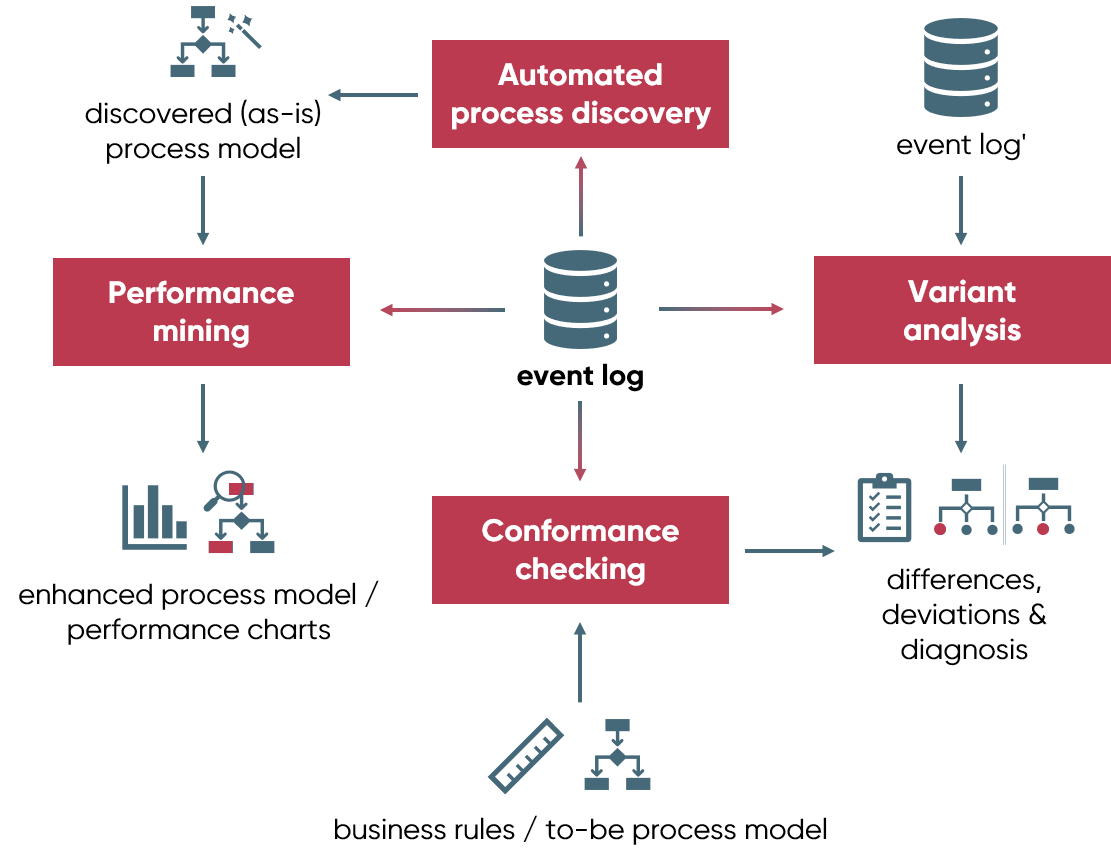












[[공식 사이트](https://pm4py.fit.fraunhofer.de)]
*   pm4py 는 파이썬으로 구현된 프로세스 마이닝 도구 
*   기존의 프로세스 마이닝 기법에 머신러닝 및 딥러닝과 같은 다양한 도구를 유기적으로 활용하기 위해 개발된 도구





##2.Process Mining Tool
1. Disco (https://fluxicon.com/disco/)
- 네덜란드 'Fluxicon'이라는 업체가 만든 프로세스 마이닝 솔루션
- 전세계에서 가장 많이 사용되는 프로세스 마이닝 솔루션 중 하나
- 장점: 사용이 가장 쉽고, 편하다. 코딩을 직접하지 않고 버튼으로 기본적인 분석이 가능하다. 간편한 UI를 제공한다.
- 단점: 단순한 Process model을 발견할 수 잇지만, 정밀한 분석 작업을 진행하는 게 쉽지 않고, 세부적인 파라미터 및 값 설정이 제한된다. 
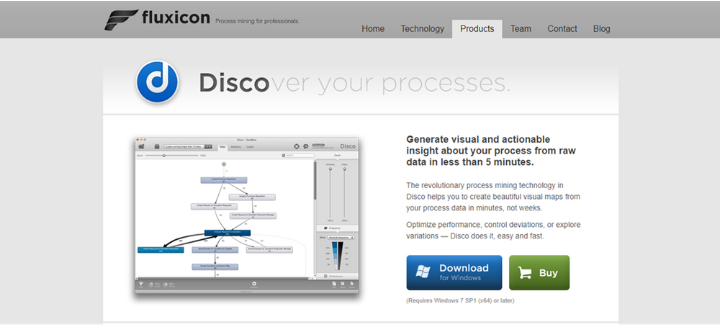


2. pm4py (https://pm4py.fit.fraunhofer.de/)


*   독일 'Fraunhofer FIT'에서 개발하였으며, 지속적으로 업데이트를 제공해주는 프로세스 마이닝 솔루션
*   Python으로 개발되어 있으며, 자유롭게 설치하여 사용가능
*   장점: 
*   단점: 






3. ProM (https://promtools.org/)
*   독일 아헨공대 Aalst교수 연구팀이 만든 프로세스 마이닝 소프트웨어
*   Java로 개발되어있으며, 새로운 기능이 Plug-in 형태로 개발되어 추가되고 있음
*   장점:
*   단점: 

In [ ]:
# pm4py 설치
!pip install pm4py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 43.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26099 sha256=7e94e27636a3c50a5a4a960ed40e874fb2e80db429a9473aeca66cc53fcb2239
  Stored in directory: /root/.cache/pip/wheels/fa/80/8c/43488a924a046b733b64de3fac99252674c892a4c3801c0a61
  Created wheel for stringdist: filename=StringDist-1.0.9-cp310-cp310-linux_x86_64.whl size=24958 sha256=3584ae5cb1b8493143320d0dc58e83edf4c3c759b20af24a110c4980b05e2f0a
  Stored in directory: /root/.cache/pip/wheels/79/25/0a/4a0c2c7af31a8b473f6e10e30312396f31ae899722600d7b99
Successfully built intervaltree stringdist


In [ ]:
# 필요 라이브러리 호출
import pm4py
from pm4py.objects.log.util import dataframe_utils
from pm4py.objects.conversion.log import converter as log_converter
import pandas as pd



In [ ]:
#Colab drive 모듈 이용하여 연동
from google.colab import drive
drive.mount('/content/gdriv')

Drive already mounted at /content/gdriv; to attempt to forcibly remount, call drive.mount("/content/gdriv", force_remount=True).


#데이터 설명
*   출처: BPI Challenge 2016 (https://data.4tu.nl/collections/ea85f19e-26a9-497a-9ac8-06afb069d6a7)
*   네덜란드에서 고용 보험관련하여 웹사이트에서 기록된 로그인 가능한 회원들의 "사이트 내 이동 경로", "컴플레인 사항"에 관한 이벤트 로그

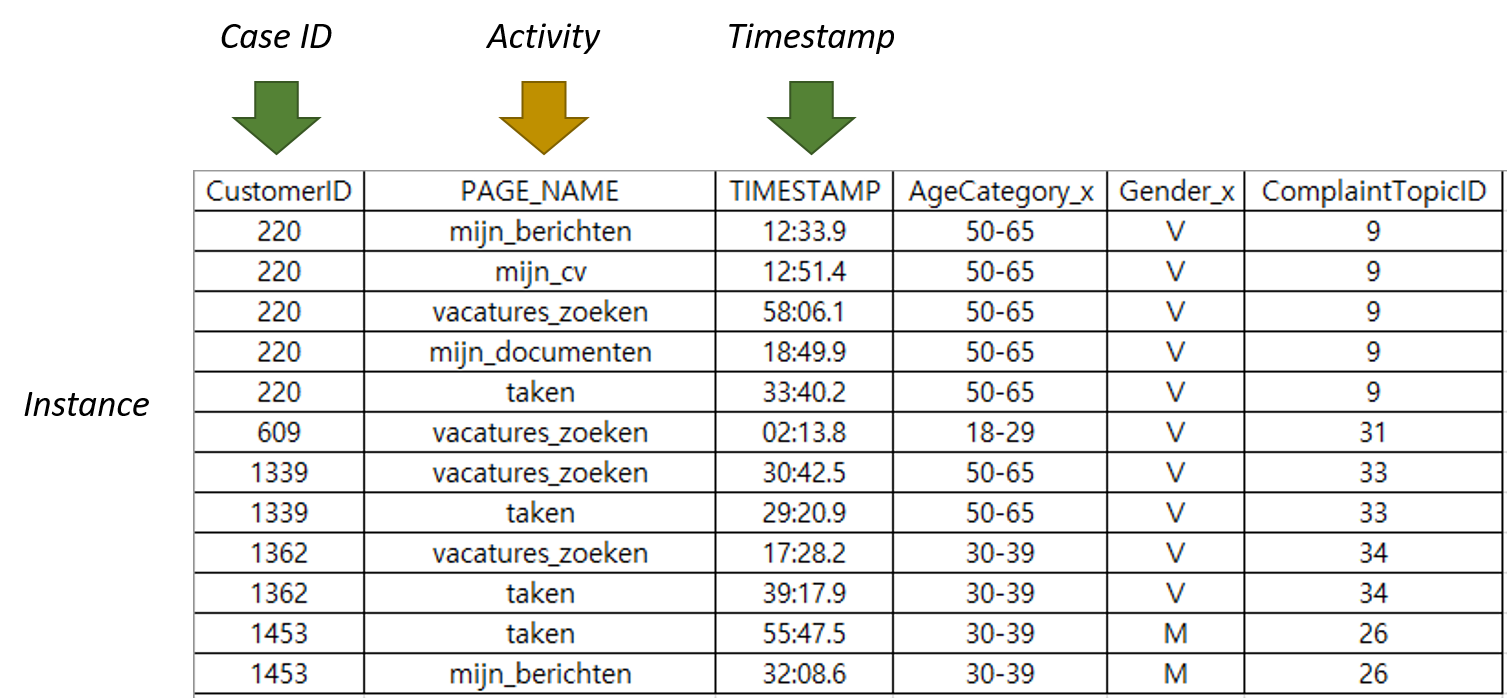


In [ ]:
# 실습용 데이터 호출
init_log = pd.read_csv('https://raw.githubusercontent.com/hrbae/LG_AI_training/main/M1_Proces_Innovationby_ML/eventlog%20(2).csv')
print(init_log.columns)
init_log

Index(['CustomerID', 'PAGE_NAME', 'TIMESTAMP', 'AgeCategory_x', 'Gender_x',
       'ComplaintTopicID'],
      dtype='object')


CustomerID           PAGE_NAME                TIMESTAMP AgeCategory_x  \
0         2025826              50plus  2015-10-05 10:12:56.880         50-65   
1         1503890        aanvragen-tw  2015-09-01 19:35:06.707         50-65   
2         2063574              50plus  2015-11-06 10:47:42.137         40-49   
3         2185161  bijstandsuitkering  2016-01-11 18:44:07.877         18-29   
4         2074173           frankrijk  2015-11-09 22:43:19.973         50-65   
...           ...                 ...                      ...           ...   
55213     2196444               taken  2016-01-21 19:45:08.400         50-65   
55214     2043571                 wdo  2015-07-28 11:45:54.743         40-49   
55215      990071                 wdo  2016-01-20 12:05:50.680         30-39   
55216     2074505                 wdo  2015-09-04 11:42:24.867         18-29   
55217     2101966                 wdo  2015-11-25 14:28:52.127         50-65   

      Gender_x  ComplaintTopicID  
0            M              59.0  
1            V              20.0  
2            M              33.0  
3            V              32.0  
4            V              19.0  
...        ...               ...  
55213        M              31.0  
55214        M              26.0  
55215        V              29.0  
55216        V              26.0  
55217        M               9.0  

[55218 rows x 6 columns]

In [ ]:
init_log.dtypes

CustomerID            int64
PAGE_NAME            object
TIMESTAMP            object
AgeCategory_x        object
Gender_x             object
ComplaintTopicID    float64
dtype: object


*   CustomerID와 TIMESTAMP의 datatype을 변경
---
*   CustomerID: int64 -> object
*   TIMESTAMP: object -> datetime64


In [ ]:
init_log['CustomerID']=init_log['CustomerID'].astype(str)
init_log['TIMESTAMP']=pd.to_datetime(init_log['TIMESTAMP'])
init_log.dtypes

CustomerID                  object
PAGE_NAME                   object
TIMESTAMP           datetime64[ns]
AgeCategory_x               object
Gender_x                    object
ComplaintTopicID           float64
dtype: object

#데이터 필터링



In [64]:
#Activity 목록 도출
from pm4py.algo.filtering.pandas.attributes import attributes_filter
activities=attributes_filter.get_attribute_values(init_log, attribute_key='PAGE_NAME')
print(activities)

{'taken': 11114, 'vacatures_zoeken': 10246, 'mijn_werkmap': 6643, 'mijn_berichten': 4926, 'wdo': 4114, 'mijn_cv': 3724, 'mijn_sollicitaties': 3151, 'mijn_online_trainingen': 2171, 'foutopgetreden.html': 1435, 'home': 1286, 'timeout.htm': 1054, 'mijn_bewijs_van_inschrijving': 872, 'wijziging_doorgeven': 842, 'mijn_documenten': 798, 'Portal (ignore_request_page)': 685, 'sollicitatie-wijziging': 542, 'mijn_tips': 355, 'mijn_rechten_en_plichten': 222, 'inschrijven': 161, 'mijn_agenda': 155, 'mijn_netwerk': 114, 'wdo211832': 101, 'werk-zoeken': 81, 'handleiding': 79, 'evenement': 66, 'PORTAL.wwsec_app_priv.logout': 60, 'onderhoud.htm': 32, 'cv-plaatsen': 29, 'tip-van-de-week': 25, 'mijn_taken': 16, 'ontslag': 16, 'over-werk-nl': 15, 'wederzijds-goedvinden': 14, 'gegevens': 7, 'werkmap': 6, '50plus': 6, 'bijstandsuitkering': 6, 'ignore_request_page': 5, 'PORTAL.wwpob_smd.login2': 5, 'nieuwsbericht': 5, 'uwv': 5, 'wdo214236': 4, 'rechtbijstand': 4, 'transitievergoeding': 3, 'regelen': 3, 'aan

In [52]:
#Inductive miner를 활용하여 petrinet을 도출(original data를 가지고 key값을 지정해주면서 도출)
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(init_log, activity_key='PAGE_NAME',timestamp_key='TIMESTAMP', case_id_key='CustomerID')
pm4py.view_petri_net(net, initial_marking, final_marking)


*   Filtering Variant
---


*   각 CaseID가 거쳐간 Activity들의 집합을 'Trace'라고 정의
*   수많은 Case가 포함되어 있는 Eventlog에서 동일한 Trace를 따르는 Case들이 따라가는 해당 Trace를 'Variant'라고 정의
*   Variant 종류가 줄어듬에 따라 Process Map 또한 축소되는 것을 확인할 수 있음





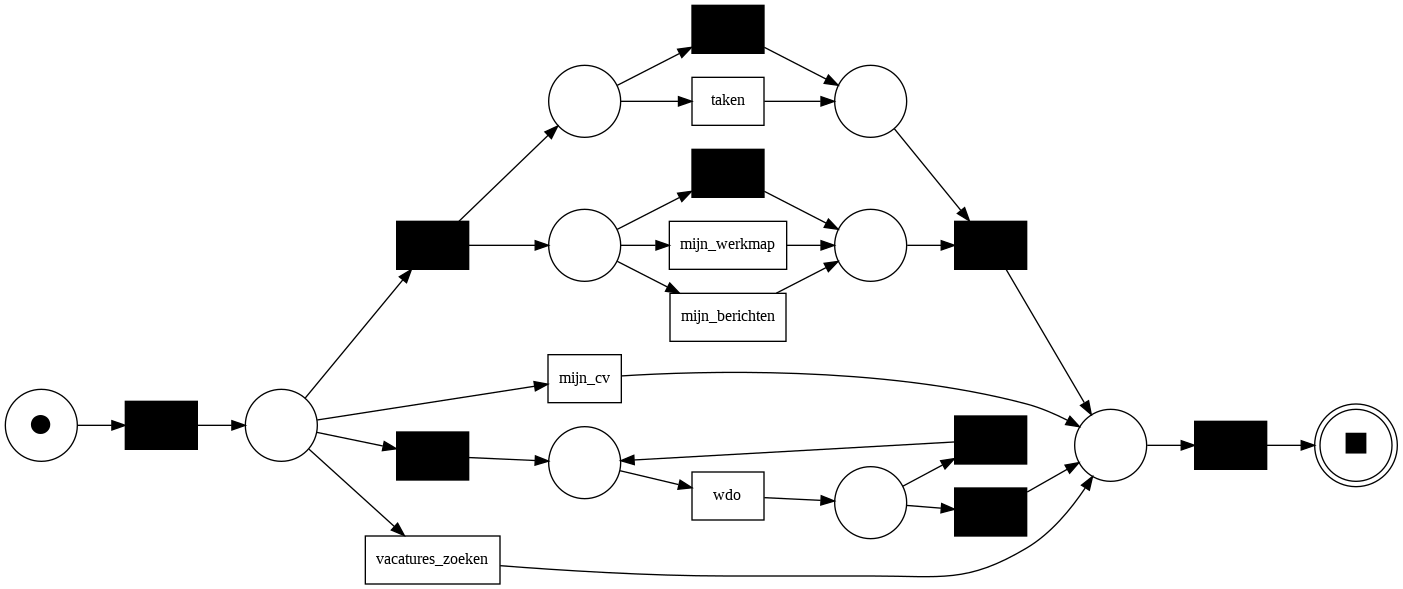

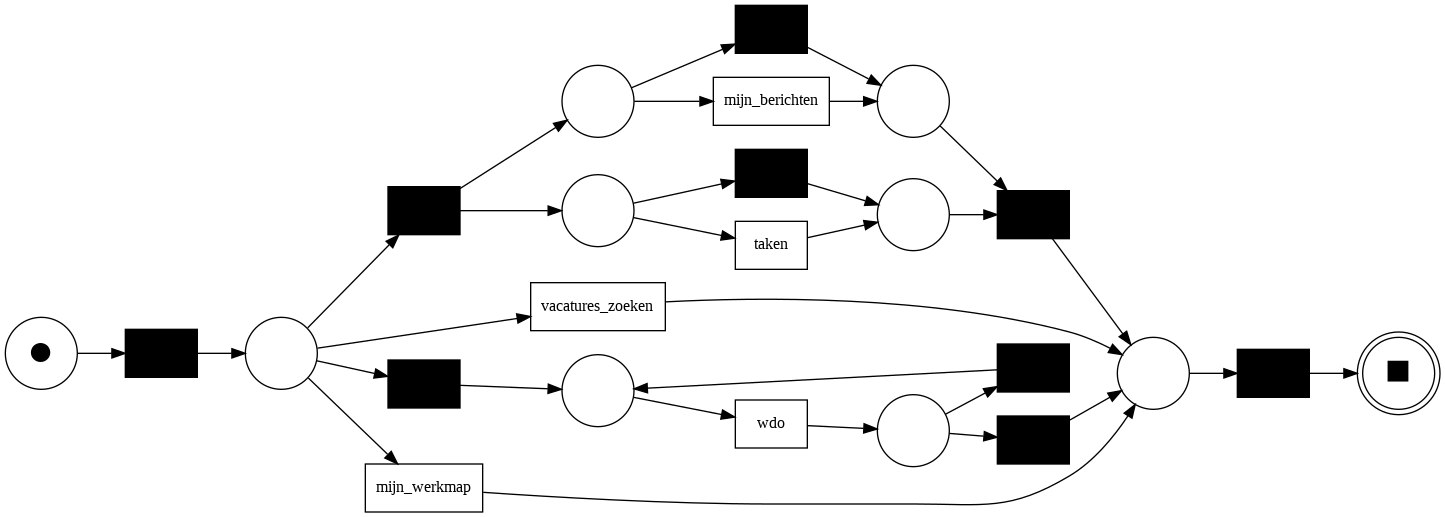

In [ ]:
# Top k개 Variant를 필터링 (= 가장 많은 Case들이 따라간 Trace)

# top 45개의 Variant로 필터링
top45 = pm4py.filter_variants_top_k(init_log, k = 45, activity_key='PAGE_NAME',timestamp_key='TIMESTAMP', case_id_key='CustomerID')
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(top45, activity_key='PAGE_NAME',timestamp_key='TIMESTAMP', case_id_key='CustomerID')
pm4py.view_petri_net(net, initial_marking, final_marking)


# top 25개의 Variant로 필터링
top25 = pm4py.filter_variants_top_k(init_log, k = 25, activity_key='PAGE_NAME',timestamp_key='TIMESTAMP', case_id_key='CustomerID')
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(top25, activity_key='PAGE_NAME',timestamp_key='TIMESTAMP', case_id_key='CustomerID')
pm4py.view_petri_net(net, initial_marking, final_marking)



*   Filtering Activity
---





*   pm4py 를 이용해 프로세스 마이닝을 수행하기 위한 column명 설정

---


*   Case ID: 'case:concept:name'
*   Activity name : 'concept:name'
*   Timestamp : 'time:timestamp'





In [ ]:
eventlog=init_log.copy()
eventlog.rename(columns={'TIMESTAMP':'time:timestamp',
                          'CustomerID':'case:concept:name',
                          'PAGE_NAME':'concept:name'}, inplace=True)
log=log_converter.apply(eventlog)
print(log)

[{'attributes': {'concept:name': '2025826'}, 'events': [{'concept:name': '50plus', 'time:timestamp': Timestamp('2015-10-05 10:12:56.880000'), 'AgeCategory_x': '50-65', 'Gender_x': 'M', 'ComplaintTopicID': 59.0}, '..', {'concept:name': 'home', 'time:timestamp': Timestamp('2015-09-21 20:42:31.277000'), 'AgeCategory_x': '50-65', 'Gender_x': 'M', 'ComplaintTopicID': 24.0}]}, '....', {'attributes': {'concept:name': '2038848'}, 'events': [{'concept:name': 'wdo', 'time:timestamp': Timestamp('2015-11-04 15:14:21.140000'), 'AgeCategory_x': '50-65', 'Gender_x': 'M', 'ComplaintTopicID': 33.0}]}]


In [67]:
#Start & End Activities 도출
from pm4py.algo.filtering.log.end_activities import end_activities_filter
from pm4py.algo.filtering.log.start_activities import start_activities_filter
start_activities = start_activities_filter.get_start_activities(log)
end_activities = end_activities_filter.get_end_activities(log)
print(start_activities)

{'50plus': 6, 'aanvragen-tw': 3, 'bijstandsuitkering': 6, 'frankrijk': 1, 'inschrijven': 153, 'gegevens': 7, 'melding_sha2': 2, 'mijn_cv': 310, 'malta': 1, 'wijziging_doorgeven': 406, 'timeout.htm': 132, 'mijn_online_trainingen': 1110, 'mijn_tips': 185, 'PORTAL.wwpob_smd.login2': 1, 'mijn_agenda': 26, 'mijn_netwerk': 20, 'mijn_werkmap': 964, 'mijn_taken': 2, 'onderhoud.htm': 7, 'PORTAL.wwsec_app_priv.logout': 10, 'mijn_berichten': 1485, 'mijn_bewijs_van_inschrijving': 243, 'home': 370, 'taken': 4520, 'foutopgetreden.html': 309, 'vacatures_zoeken': 4077, 'Portal (ignore_request_page)': 35, 'mijn_sollicitaties': 272, 'mijn_rechten_en_plichten': 33, 'mijn_documenten': 43, 'werk-zoeken': 7, 'tip-van-de-week': 1, 'wdo': 359, 'evenement': 2, 'cv-plaatsen': 4, 'sollicitatie-wijziging': 81, 'handleiding': 8, 'wdo211832': 8, 'uwv': 1, 'wederzijds-goedvinden': 2}


Text(0.5, 1.0, 'End activity Distribution')

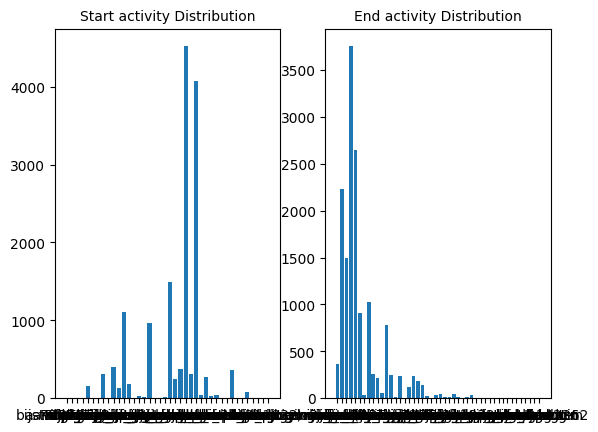

In [72]:
#Start activity와 End activity의 분포 barchart
import matplotlib.pyplot as plt
fig,ax=plt.subplots(nrows=1, ncols=2)
ax=ax.ravel()
ax[0].bar(x=list(start_activities.keys()),height=list(start_activities.values()))
ax[0].set_title("Start activity Distribution",fontsize=10)
ax[1].bar(x=list(end_activities.keys()),height=list(end_activities.values()))
ax[1].set_title("End activity Distribution",fontsize=10)

In [74]:
# 첫 activity가 'wdo'인 케이스
wdo_event=pm4py.filter_start_activities(log, activities=['wdo'])
start_activities = start_activities_filter.get_start_activities(wdo_event)
print(start_activities)

{'wdo': 359}


In [75]:
# 마지막 activity가 'ignore_request_page'인 케이스
pm4py.filter_end_activities(log, activities=['ignore_request_page'])

[{'attributes': {'concept:name': '2136694'}, 'events': [{'concept:name': 'timeout.htm', 'time:timestamp': Timestamp('2015-12-20 22:57:26.617000'), 'AgeCategory_x': '18-29', 'Gender_x': 'M', 'ComplaintTopicID': 9.0}, '..', {'concept:name': 'ignore_request_page', 'time:timestamp': Timestamp('2015-11-26 14:16:02.907000'), 'AgeCategory_x': '40-49', 'Gender_x': 'M', 'ComplaintTopicID': 24.0}]}]

*   Filtering Timestamp
----


In [76]:
# 특정 시점에 모든 이벤트가 포함되는 이벤트 데이터만 필터링
from pm4py.algo.filtering.log.timestamp import timestamp_filter
filtered_log = timestamp_filter.filter_traces_contained(log, "2016-01-01 00:00:00", "2016-06-30 00:00:00")

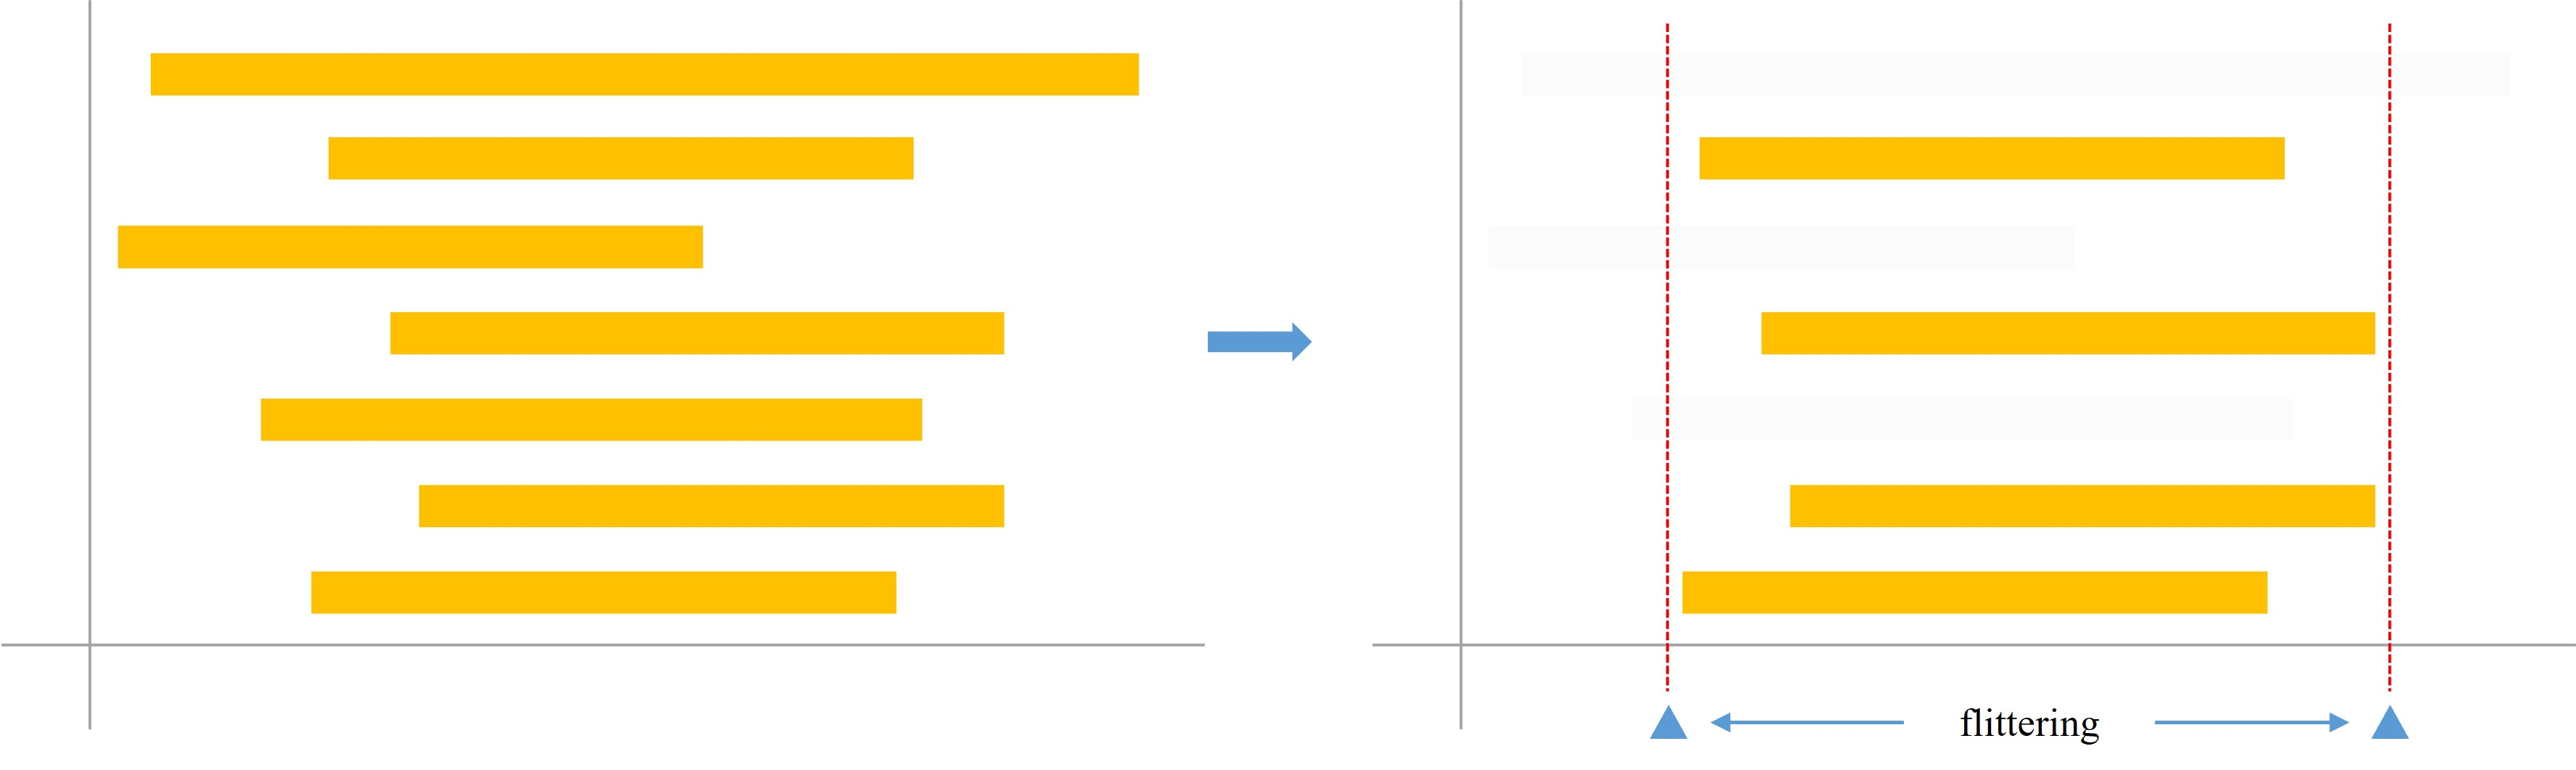

In [58]:
filtered_log

[{'attributes': {'concept:name': '2185161'}, 'events': [{'concept:name': 'bijstandsuitkering', 'time:timestamp': Timestamp('2016-01-11 18:44:07.877000'), 'AgeCategory_x': '18-29', 'Gender_x': 'V', 'ComplaintTopicID': 32.0}, '..', {'concept:name': 'vacatures_zoeken', 'time:timestamp': Timestamp('2015-11-19 14:15:40.627000'), 'AgeCategory_x': '50-65', 'Gender_x': 'M', 'ComplaintTopicID': 28.0}]}, '....', {'attributes': {'concept:name': '1904683'}, 'events': [{'concept:name': 'wdo', 'time:timestamp': Timestamp('2016-02-11 12:32:26.593000'), 'AgeCategory_x': '30-39', 'Gender_x': 'M', 'ComplaintTopicID': 32.0}]}]

In [59]:
# 데이터 프레임으로 변환 후 확인
from pm4py.objects.conversion.log import converter as log_converter
dt = log_converter.apply(filtered_log, variant=log_converter.Variants.TO_DATA_FRAME)
print(dt)

                 concept:name                   time:timestamp AgeCategory_x  \
0          bijstandsuitkering 2016-01-11 18:44:07.877000+00:00         18-29   
1      mijn_online_trainingen 2015-11-29 18:10:11.980000+00:00         18-29   
2            vacatures_zoeken 2015-11-19 14:15:40.627000+00:00         50-65   
3                aanvragen-tw 2016-01-19 10:44:52.140000+00:00         50-65   
4                         wdo 2016-01-19 10:45:49.523000+00:00         50-65   
...                       ...                              ...           ...   
19253                     wdo 2016-02-26 08:39:05.200000+00:00         50-65   
19254            mijn_werkmap 2016-02-26 09:29:16.877000+00:00         30-39   
19255                   taken 2016-02-17 19:46:04.970000+00:00         50-65   
19256                     wdo 2016-02-26 09:29:02.337000+00:00         50-65   
19257                     wdo 2016-02-11 12:32:26.593000+00:00         30-39   

      Gender_x  ComplaintTopicID case:c